<font size="6"><b>Parameter Estimation in Probabilistic Model</b></font>

Table of Contents
<div id="toc"></div>

# 1. Generative model

$$
P\left(y \mid X,\omega,\sigma^2 \right) = N\left(\omega^TX,\sigma^2 \right)$$

<br>
<img src="./image_files/ML001.png" width = 250>
<br>
<br>
<img src="./image_files/ML002.png" width = 250>
<br>

# 2. Maximum Likelihood Estimation (MLE)

Estimate pramters $\theta\left(\omega,\sigma^2\right)$ such that maximize likelihood given a generative model
- Given observed data $$ D=\{(x_1,y_1),(x_2,y_2),\cdots,(x_m,y_m)\}$$


- Generative model structure 

$$ 
\begin{align*}
y_i &= \hat{y}_i + \varepsilon \\
    &=\omega^T x_i+\varepsilon,\quad \varepsilon \sim N\left(0,\sigma^2\right)
\end{align*}    
$$
    

- Find parameters $\omega$ and $\sigma$ that maximize the likelihood over the observed data or


- Likelihood:


$$\begin{align*} L(\omega,\sigma)
& = P\left(y_1,y_2,\cdots,y_m \mid x_1,x_2,\cdots,x_m; \; \underbrace{\omega, \sigma}_{\theta}\right)\\
& = \prod\limits_{i=1}^{m} P\left(y_i \mid x_i; \; \omega,\sigma\right)\\
& = \frac{1}{(2\pi\sigma^2)^\frac{m}{2}}\exp\left(-\frac{1}{2\sigma^2}\sum\limits_{i=1}^m(y_i-\omega^T x_i)^2\right)
\end{align*}$$


- Perhaps the simplest (but widely used) parameter estimation method

## 2.1. Given $m$ data points, drawn from an exponential distribution 

- Exponential distribution from [Fundamentals of statistics](http://www.statlect.com/exponential_distribution_maximum_likelihood.htm)

<br>
$$f(y)=\frac{1}{a}\exp\left(-\frac{1}{a}y \right)\text{: generative model}$$
<br><br>
$$\begin{align*} L
& = P\left(y_1,y_2,\cdots,y_m \mid a \right)\\
& = \prod\limits_{i=1}^m\frac{1}{a} \exp\left(-\frac{1}{a}y_i \right)\\
& = \frac{1}{a^m} \exp\left(-\frac{1}{a}\sum\limits_{i=1}^m y_i \right)\\ \\
\text{Log-likelihood} \; \ell &=\text{log}L=-m\text{log}a-\frac{1}{a}\sum\limits_{i=1}^m y_i
\end{align*} $$

- Find $a$ that maximizes $\ell$
$$\frac{d\ell}{da}=-\frac{m}{a}+\frac{1}{a^2}\sum\limits_{i=1}^m y_i = 0 \\
\therefore \;\; a_{ML}=\frac{1}{m}\sum\limits_{i=1}^m y_i$$

In [1]:
% exponential random variable
m = 50;
x = exprnd(700,1,m);  % mu = 700

% MLE of 
1/m*sum(x)

ans =

  608.7010

## 2.2. Given $m$ data points, drawn from a Gaussian distribution

$$
\begin{align*} 
P\left(y=y_i \mid \mu,\sigma^2\right)
& =\frac{1}{\sqrt{2\pi}\sigma}\exp \left(-\frac{1}{2\sigma^2}(y_i-\mu)^2 \right) \text{: generative model}\\\\
L = P \left(y_1,y_2,\cdots,y_m \mid \mu,\sigma^2 \right)
& =\prod\limits_{i=1}^m\frac{1}{\sqrt{2\pi}\sigma}\exp\left(-\frac{1}{2\sigma^2}\left(y_i-\mu\right)^2\right)\\
& = \frac{1}{(2\pi)^\frac{m}{2}\sigma^m}\exp\left(-\frac{1}{2\sigma^2}\sum\limits_{i=1}^m(y_i-\mu)^2 \right)\\\\
\ell &=-\frac{m}{2} \text{log}{2\pi}-m \text{log}{\sigma}-\frac{1}{2\sigma^2}\sum\limits_{i=1}^m(y_i-\mu)^2
\end{align*}$$

- To maximize, $\frac{\partial \ell}{\partial \mu}=0, \frac{\partial \ell}{\partial \sigma}=0$

$$
\begin{align*}
\frac{\partial \ell}{\partial \mu} &=\frac{1}{\sigma^2}\sum\limits_{i=1}^m(y_i-\mu)=0 \;\; \implies \mu_{ML}=\frac{1}
{m}\sum\limits_{i=1}^m y_i\\
\frac{\partial \ell}{\partial \sigma} &= -\frac{m}{\sigma}+\frac{1}{\sigma^3}\sum\limits_{i=1}^m(y_i-\mu)^2=0 \;\; \implies 
\sigma_{ML}^2=\frac{1}{m}\sum\limits_{i=1}^m(y_i-\mu)^2
\end{align*}
$$

- BIG Lesson
    - We often compute a mean and variance to represent data statistics
    - We kind of assume that a data set is Gaussian distributed
    - Good news: sample mean is Gaussian distributed by the central limit theorem

__Numerical Simulation__

- Compute likelihood function
    - maximize the likelihood function 
    - adjust the mean and variance of the Gaussian to maximize its product

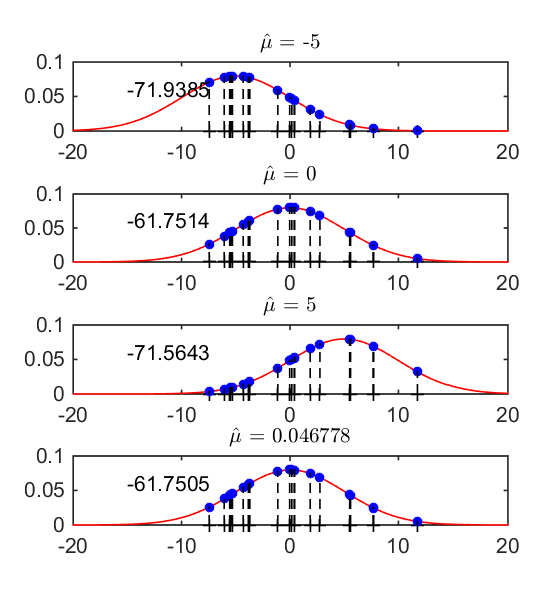

In [2]:
%plot -s 560,600
% MLE of Gaussian distribution 
% mu

m = 20;
mu = 0;
sigma = 5;

x = normrnd(mu,sigma,1,m);
xp = linspace(-20,20,100);
y0 = zeros(1,m);

mu_ml = mean(x);
muhat = [-5 0 5 mu_ml];

for i = 1:4   
    yp = normpdf(xp,muhat(i),sigma); % to plot pdf
    y = normpdf(x,muhat(i),sigma);
    g = sum(log(y));

    subplot(4,1,i)
    plot(xp,yp,'r');  hold on
    plot(x,y0,'k+');
    plot(x,y,'bo','markerfacecolor','b','markersize',4)
    plot([x;x],[y0;y],'k--');  hold off

    htitle = title(['$\hat{\mu}$ = ',num2str(muhat(i))]);
    set(htitle,'Interpreter','Latex');
    set(htitle,'fontsize',10)

    ht = text(-15,0.06,num2str(g));
    set(ht,'fontsize',10)
    xlim([-20 20])
end

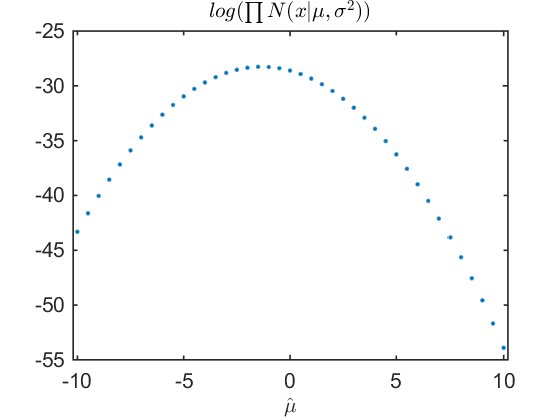

In [3]:
%plot -s 560,420

% mean is unknown in this example
% variance is known in this example

m = 10;
mu = 0;
sigma = 5;

x = normrnd(mu,sigma,1,m);

%
muhat = -10:0.5:10;
G = [];

for i = 1:length(muhat)    
    y = normpdf(x,muhat(i),sigma);    
    g = sum(log(y));
    G = [G g];
end

plot(muhat,G,'.') 

xlim([-10.2 10.2])
xlabel('$\hat{\mu}$','fontsize',10,'Interpreter','Latex')
htitle = title('$log (\prod{N(x|\mu,\sigma^2)})$');
set(htitle,'Interpreter','Latex');
set(htitle,'fontsize',10)

Compare to a result from formula

$$\mu_{ML}=\frac{1}{m}\sum_{i = 1}^{m}x_i$$

In [4]:
mean(x)

ans =

   -1.3230

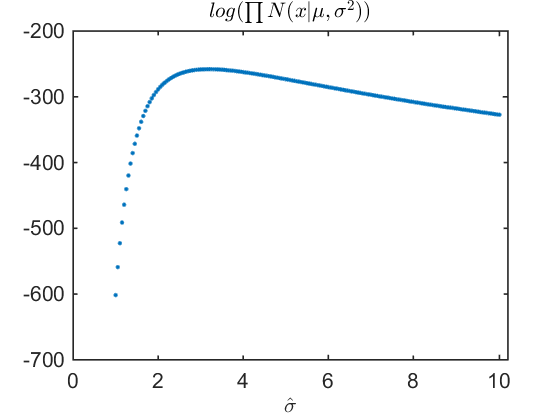

In [5]:
%plot -s 560,420
% mean is known in this example
% variance is unknown in this example

m = 100;
mu = 0;
sigma = 3;

x = normrnd(mu,sigma,1,m);  % samples

sigmahat = 1:0.05:10;
G = [];

for i = 1:length(sigmahat)
    y = normpdf(x,mu,sigmahat(i));      % likelihood    
    g = sum(log(y));
    G = [G g];
end

plot(sigmahat,G,'.')
xlim([0 10.2])
xlabel('$\hat{\sigma}$','fontsize',10,'Interpreter','Latex')
htitle = title('$log (\prod{N(x|\mu,\sigma^2)})$');
set(htitle,'Interpreter','Latex');
set(htitle,'fontsize',10)

In [6]:
sqrt(var(x))

ans =

    3.1958

## 2.3. Linear Regression: A Probablistic View

- Probabilistic Machine Learning
    - I personally believe this is a more fundamental way of looking at ML


- Linear regression model with (Gaussian) normal erros 

$$ 
\begin{align*}
y &=\omega^T x + \varepsilon, \;\; \varepsilon \sim N(0,\sigma^2)\\
y - \omega^T x &= \varepsilon \sim N\left(0,\sigma^2\right)\\ \\
P \left(y_i \mid x_i;\omega,\sigma^2\right) & =\frac{1}{\sqrt{2\pi}\sigma}
\exp \left(-\frac{1}{2\sigma^2}\left(y_i-\omega^Tx_i\right)^2 \right) \text{: generative model}
\end{align*}
$$

$$\begin{align*} 
L = P\left(y_1,y_2,\cdots,y_m \mid \mu,\sigma^2\right)
& =\prod\limits_{i=1}^m P\left(y_i \mid x_i; \; \omega,\sigma^2\right) \\
& =\frac{1}{\left(\sqrt{2\pi}\right)^m}\frac{1}{\sigma^m} \exp\left(-\frac{1}{2\sigma^2}\sum\limits_{i=1}^m\left(y_i-\omega^T x_i\right)^2\right)=\text{likelihood} \\\\
\ell &= -\frac{m}{2}\log{2\pi}-m\log{\sigma}-\frac{1}{2\sigma^2}\sum\limits_{i=1}^m\left(y_i-\omega^T x_i\right)^2\\\\
\frac{d\ell}{d\omega} &=-2X^TY+2X^TX\omega=0\;
\implies \; \omega_{ML}=\left(X^TX\right)^{-1}X^TY 
\quad \text{(look familiar ?)}\\
\frac{d\ell}{d\sigma}
& =-\frac{m}{\sigma}+\frac{1}{\sigma^3}\sum\limits_{i=1}^m\left(y_i-\omega^T x_i\right)^2=0  
\implies \; \sigma^2_{ML}=\frac{1}{m}\sum\limits_{i=1}^m\left(y_i-\omega^T x_i\right)^2
\end{align*}$$



- BIG Lession
    - same as the least squared optimization
    
$$\begin{align*} 
\text{loss function}
& =\sum\limits_{i=1}^m\left(y_i-\omega^T x_i\right)^2 \\
& =\|Y-X\omega\|^2_2 \\
& =\left(Y-X\omega\right)^T\left(Y-X\omega\right)\\
& =Y^TY-\omega^TX^TY-Y^TX\omega+\omega^TX^TX\omega\\ \\
\end{align*}$$

__Numerical simulation__

In [7]:
m = 100;            % # of data points

a = 1;              % slope
x = 3 + 2*rand(m,1);
e = 0.1*randn(m,1);

y = a*x + e;

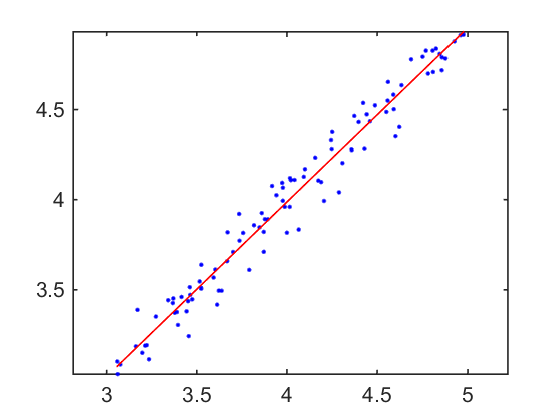

In [8]:
% compute theta(1) and theta(2) which are coefficients of y = theta(1)*x +
% theta(2)
A = [x ones(m,1)];
theta = inv(A'*A)*A'*y;

% to plot the fitted line
xp = linspace(min(x),max(x),m)';
yp = theta(1)*xp + theta(2);

plot(x,y,'b.',xp,yp,'r');
axis equal

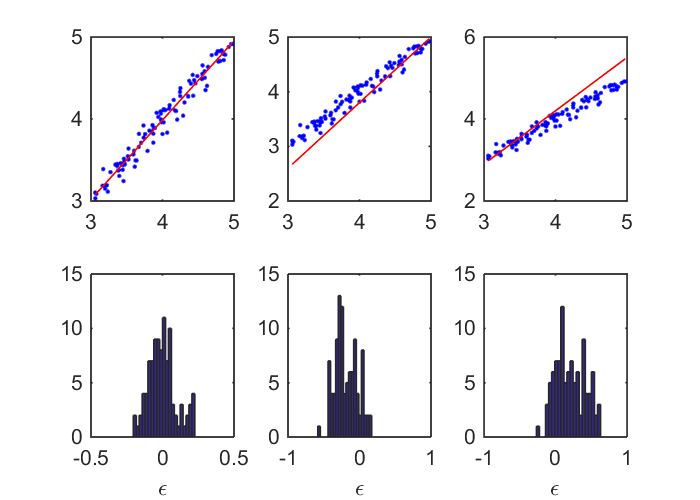

In [9]:
%plot -s 700,500

yhat0 = theta(1)*x + theta(2);
error0 = yhat0-y;

yhat1 = 1.2*x - 1;
error1 = yhat1-y;

yhat2 = 1.3*x - 1;
error2 = yhat2-y;

subplot(2,3,1), plot(x,y,'b.',x,yhat0,'r'); 
subplot(2,3,2), plot(x,y,'b.',x,yhat1,'r');
subplot(2,3,3), plot(x,y,'b.',x,yhat2,'r');
subplot(2,3,4), hist(error0,21),    xlabel('\epsilon')
subplot(2,3,5), hist(error1,21),    xlabel('\epsilon')
subplot(2,3,6), hist(error2,21),    xlabel('\epsilon')

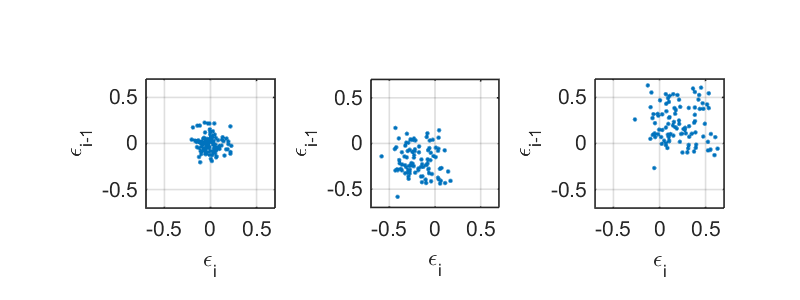

In [10]:
%plot -s 800,300
a01 = error0(2:end);
a02 = error0(1:end-1);

a11 = error1(2:end);
a12 = error1(1:end-1);

a21 = error2(2:end);
a22 = error2(1:end-1);

subplot(1,3,1)
plot(a01,a02,'.'),    axis equal,   axis([-0.7 0.7 -0.7 0.7]),   grid on
xlabel('\epsilon_i'),   ylabel('\epsilon_{i-1}')

subplot(1,3,2)
plot(a11,a12,'.'),    axis equal,   axis([-0.7 0.7 -0.7 0.7]),   grid on
xlabel('\epsilon_i'),   ylabel('\epsilon_{i-1}')

subplot(1,3,3)
plot(a21,a22,'.'),    axis equal,   axis([-0.7 0.7 -0.7 0.7]),   grid on
xlabel('\epsilon_i'),   ylabel('\epsilon_{i-1}')

## 2.4. Data Fusion with Uncertainties

- [Learning Theory (Reza Shadmehr, Johns Hopkins University)](http://www.shadmehrlab.org/Courses/learningtheory.html)
    - [youtube](https://www.youtube.com/watch?v=52jlBrAcw9Q)

<table style="border-style: hidden; border-collapse: collapse;" width = "70%"> 
    <tr style="border-style: hidden; border-collapse: collapse;">
        <td width = 35% style="border-style: hidden; border-collapse: collapse;">
<img src="./image_files/ML003.png" width=150>             
        </td>
        <td width = 35%>
$$\begin{align*} y_a &= x + \varepsilon_a, \; \varepsilon_a \sim N\left(0,\sigma^2_a\right) \\
y_b &= x + \varepsilon_b, \; \varepsilon_b \sim N\left(0,\sigma^2_b\right) \end{align*}$$
        </td>
    </tr>
</table>

- in a matrix form

$$ y = \begin{bmatrix} y_a \\ y_b\end{bmatrix} = Cx+\varepsilon = \begin{bmatrix}1\\1\end{bmatrix}x+\begin{bmatrix}\varepsilon_a\\ \varepsilon_b \end{bmatrix} \quad \quad \varepsilon \sim N\left(0,R\right),\;\; R=\begin{bmatrix} \sigma^2_a & 0\\ 0 & \sigma^2_b\end{bmatrix}$$

<br>
$$\begin{align*}P\left(y \mid x\right) & \sim N\left(Cx,R\right)\\
                            &= \frac{1}{\sqrt{\left(2\pi\right)^2\vert R \vert}}\exp\left(-\frac{1}{2}\left(y-Cx\right)^TR^{-1}\left(y-Cx\right)\right)\end{align*}$$
<br>

- Find $\,\hat{x}_{ML}$

$$\ell = -\log{2\pi}-\frac{1}{2}\log{\vert R \vert}-\frac{1}{2} \underbrace{\left(y-Cx\right)^TR^{-1}\left(y-Cx\right)}$$
<br><br>
$$ 
\begin{align*}
\left(y-Cx\right)^TR^{-1}\left(y-Cx\right) &= y^TR^{-1}y-y^TR^{-1}Cx-x^TC^TR^{-1}y+x^TC^TR^{-1}Cx \\ \\
\implies \frac{d\ell}{dx} & =0=-2C^TR^{-1}y + 2C^TR^{-1}Cx\\
\therefore \;\; x_{ML} &=\left(C^TR^{-1}C\right)^{-1}C^TR^{-1}y 
\end{align*}
$$

 
- $ \left(C^TR^{-1}C\right)^{-1}C^TR^{-1} $

$$ 
\begin{align*}
\left(C^TR^{-1}C\right) &= \begin{bmatrix}1 & 1\end{bmatrix}\begin{bmatrix}\frac{1}{\sigma^2_a} & 0 \\ 0 & \frac{1}{\sigma^2_b}\end{bmatrix}\begin{bmatrix}1\\ 1\end{bmatrix} = \frac{1}{\sigma^2_a}+\frac{1}{\sigma^2_b}\\ 
C^TR^{-1} &= \begin{bmatrix}1 & 1\end{bmatrix}\begin{bmatrix}\frac{1}{\sigma^2_a} & 0 \\ 0&\frac{1}{\sigma^2_b}\end{bmatrix}
= \begin{bmatrix}\frac{1}{\sigma^2_a} &\frac{1}{\sigma^2_b} \end{bmatrix}\\ \\
\end{align*} $$

$$\begin{align*} 
\implies \; \hat{x}_{ML} &= \left(C^TR^{-1}C\right)^{-1}C^TR^{-1}y = \left(\frac{1}{\sigma^2_a}+\frac{1}{\sigma^2_b}\right)^{-1} \begin{bmatrix}\frac{1}{\sigma^2_a} &\frac{1}{\sigma^2_b} \end{bmatrix} \begin{bmatrix}y_a\\y_b\end{bmatrix} = \frac{\frac{1}{\sigma^2_a}y_a+\frac{1}{\sigma^2_b}y_b}{\frac{1}{\sigma^2_a}+\frac{1}{\sigma^2_b}}\\ \\
\text{var}\left(\hat{x}_{ML}\right) &= \left(C^TR^{-1}C \right)^{-1}C^TR^{-1} \cdot \text{var}(y) \cdot \left( \left(C^TR^{-1}C)^{-1}C^TR^{-1} \right) \right)^T\\
& = \left(C^TR^{-1}C \right)^{-1}C^TR^{-1} \cdot R \cdot \left( \left(C^TR^{-1}C)^{-1}C^TR^{-1} \right) \right)^T\\
&= \left(C^TR^{-1}C \right)^{-1}C^T \cdot \left(R^{-1} \right)^TC \left(\left(C^TR^{-1}C \right)^{-1} \right)^T \\
&=\underbrace{\left(C^TR^{-1}C\right)^{-1}} \underbrace{C^TR^{-1}C}\left(\left(C^TR^{-1}C\right)^{-1}\right)^T = \left(C^TR^{-1}C\right)^{-1}\\
&=\frac{1}{\frac{1}{\sigma^2_a}+\frac{1}{\sigma^2_b}} \leq \;\; \sigma^2_a,\;\sigma^2_b \end{align*}$$

- summary

$$
\begin{align*}
\hat{x}_{ML} &= \frac{\frac{1}{\sigma^2_a}y_a+\frac{1}{\sigma^2_b}y_b}{\frac{1}{\sigma^2_a}+\frac{1}{\sigma^2_b}}\\
\text{var}\left(\hat{x}_{ML}\right) &= \frac{1}{\frac{1}{\sigma^2_a}+\frac{1}{\sigma^2_b}} \leq \;\; \sigma^2_a,\;\sigma^2_b 
\end{align*}
$$

- BIG Lesson: 
    - two sensors are better than one sensor $\implies$ less uncertainties
    - accuracy or uncertainty information is also important in sensors

<br>
<img src="./image_files/ML004.png", width = 700>

__Example of two rulers__
- 1D example
- how brain works on human measurements from both _haptic_ and _visual_ channels

<img src="./image_files/length_estimation.png", width = 300>

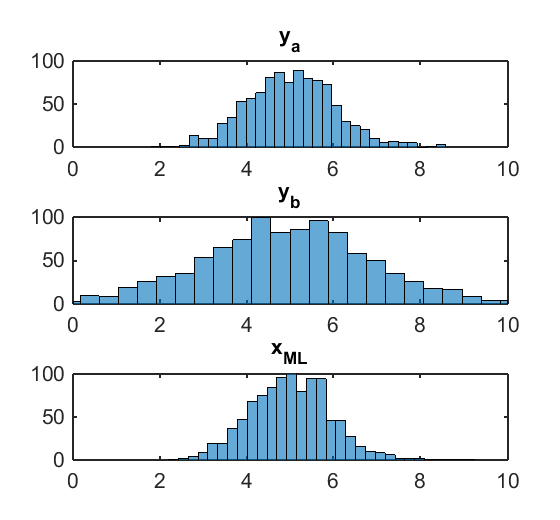

In [1]:
%plot -s 560,520
x = 5;      % true state (length in this example)
a = 1;      % sigma of a
b = 2;      % sigma of b

YA = [];
YB = [];
XML = [];

for i = 1:1000
    ya = x + normrnd(0,a);
    yb = x + normrnd(0,b);
    xml = (1/a^2*ya + 1/b^2*yb)/(1/a^2+1/b^2);
%     xml = (ya + yb)/2;      % not a good choice
    YA = [YA ya];
    YB = [YB yb];
    XML = [XML xml];
end

subplot(3,1,1),  histogram(YA,31),   xlim([0 10]),  title('y_a','fontsize',10)
subplot(3,1,2),  histogram(YB,31),   xlim([0 10]),  title('y_b','fontsize',10)
subplot(3,1,3),  histogram(XML,31),  xlim([0 10]),  ylim([0 100]), title('x_{ML}','fontsize',10)

__Example of two GPSs__
- 2D example

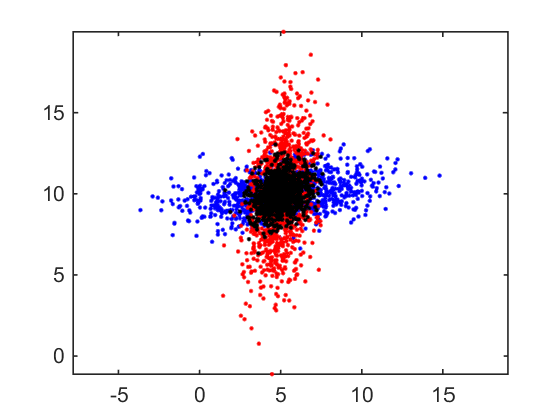

In [12]:
%plot -s 560,420
x = [5;10]; % true position
mu = [0;0];
Ra = [9 1;
      1 1];
Rb = [1 1;
      1 9];

YA = [];
YB = [];
XML = [];

for i = 1:1000
    ya = x + mvnrnd(mu,Ra)';
    yb = x + mvnrnd(mu,Rb)';
    xml = inv(inv(Ra)+inv(Rb))*(inv(Ra)*ya + inv(Rb)*yb);
%     xml = (ya + yb)/2;
    YA = [YA ya];
    YB = [YB yb];
    XML = [XML xml];
end

plot(YA(1,:),YA(2,:),'b.'),  hold on
plot(YB(1,:),YB(2,:),'r.'),
plot(XML(1,:),XML(2,:),'k.'),   hold off
axis equal

# 3. Maximum-a-Posterior Estimation (MAP)
- Choose $\theta$ that maximizes the posterior probability of $\theta$ (_i.e._ probability in the light of the observed data)

- Posterior probability of $\theta$ is given by the Bayes Rule
$$P(\theta \mid D) = \frac{P(D \mid \theta)P(\theta)}{P(D)}$$
    - $P(\theta)$: Prior probability of $\theta$ (without having seen any data)
    - $P(D \mid \theta)$: Likelihood
    - $P(D)$: Probability of the data (independent of $\theta$)
    
$$ P(D) = \int P(\theta)P(D \mid \theta) d\theta $$    

- The Bayes Rule lets us update our belief about $\theta$ in the light of observed data

- While doing MAP, we usually maximize the <font color='blue'>log of the posterior probability</font>

$$\begin{align*} \theta_{MAP} = \underset{\theta}{\mathrm{argmax}}\;\;P(\theta \mid D) &= \underset{\theta}{\mathrm{argmax}}\;\;\frac{P(D \mid \theta)P(\theta)}{P(D)}\\
& =\underset{\theta}{\mathrm{argmax}} \;\; P(D \mid \theta)P(\theta)\\
& = \underset{\theta}{\mathrm{argmax}} \;\; \log P(D \mid \theta)P(\theta)\\
& = \underset{\theta}{\mathrm{argmax}} \;\; \left\{\log{P \left(D \mid \theta \right)} + \log{P(\theta) }\right\}\end{align*}$$

- for multiple observations $D = \{d_1,d_2,\cdots,d_m\}$

$$ \theta_{MAP} = \underset{\theta}{\mathrm{argmax}} \;\; \left\{\sum_{i=1}^{m}\log{P \left(d_i \mid \theta \right)} + \log{P(\theta) }\right\} $$

- same as MLE except the extra log-prior-distribution term

- MAP allows incorporating our <font color='blue'>prior knowledge</font> about $\theta$ in its estimation

<br>
<table width = "60%"> 
    <tr>
        <td width = 30% >
$$\theta_{MAP} = \underset{\theta}{\mathrm{argmax}}\;\;P(\theta \mid D)$$
        </td>
        <td width = 30%>
$$ \theta_{MLE} = \underset{\theta}{\mathrm{argmax}}\;\;P(D \mid \theta) $$
        </td>
    </tr>
</table>
<br>

## 3.1. MAP for mean of a univariate Gaussian, $N(\theta,\sigma^2)$

Suppose that $\theta$ is a random variable with $\theta \sim N(\mu,1^2)$, but a prior knowledge (unknown $\theta$ and known $\mu, \; \sigma^2$)

Observations $ D=\{x_1,x_2,\cdots,x_m\}: \text{conditionally independent given}\; \theta$

$$ x_i \sim N(\theta,\sigma^2) $$

- Joint Probability
$$ P(x_1,x_2,\cdots,x_m \mid \theta) = \prod\limits_{i=1}^m P(x_i \mid \theta) $$

- MAP: choose $\theta_{MAP}$

$$\begin{align*} \theta_{MAP} &= \underset{\theta}{\mathrm{argmax}}\;\;P(\theta \mid D)=\frac{P(D \mid \theta)P(\theta)}{P(D)}\\
& = \underset{\theta}{\mathrm{argmax}} \;\; P(D \mid \theta)P(\theta)\\
& = \underset{\theta}{\mathrm{argmax}} \;\; \left\{\log{P \left(D \mid \theta \right)} + \log{P(\theta) }\right\}\end{align*}$$


$$\begin{align*} 
\frac{\partial}{\partial \theta} \left(\log{P \left(D \mid \theta \right)} \right)
& =\; \cdots \; = \frac{1}{\sigma^2} \left(\sum\limits_{i=1}^m x_i-m\theta \right)\quad (\text{we did in MLE})\\
\frac{\partial}{\partial \theta} \left(\log{P \left(\theta \right)} \right)
&=\frac{\partial}{\partial\theta} \left(\log \left(\frac{1}{\sqrt{2\pi}}e^{-\frac{1}{2}(\theta-\mu)^2} \right) \right)\\
& \; \vdots \\
&=\frac{\partial}{\partial\theta} \left(-\frac{1}{2}\log{2\pi}-\frac{1}{2} \left(\theta - \mu \right)^2 \right)\\
& =\mu-\theta \\ \\
\implies  \frac{\partial}{\partial \theta} \left(\log{P \left(D \mid \theta \right)} \right) +  \frac{\partial}{\partial \theta} \left(\log{P \left(\theta \right)} \right)  & =  \frac{1}{\sigma^2}\left(\sum\limits_{i=1}^m x_i - m\theta^* \right) + \mu - \theta^* = 0 \\
& = \frac{1}{\sigma^2}\sum\limits_{i=1}^m x_i + \mu - \left(\frac{m}{\sigma^2}+1\right)\theta^* = 0 \\
\theta^* &= \frac{\frac{1}{\sigma^2}\sum\limits_{i=1}^m x_i + \mu}{\frac{m}{\sigma^2}+1} = \frac{\frac{m}{\sigma^2}\cdot\frac{1}{m}\sum\limits_{i=1}^m x_i+1\cdot\mu}{\frac{m}{\sigma^2}+1}
\end{align*}
$$

<br>
$$\therefore \;\theta_{MAP} = \frac{\frac{m}{\sigma^2}}{\frac{m}{\sigma^2}+1}\bar{x}+\frac{1}{\frac{m}{\sigma^2}+1}\mu \;\;\;\text{: look familiar ?}$$


- ML interpretation: 

$$\begin{align*}
&\begin{cases}
\mu = \text{prior mean}\\
\bar{x} = \text{sample mean}
\end{cases} \\
&\begin{cases}
\mu = 1\text{st} \;\;\text{observation} \; \sim N\left(0,1^2\right)\\
\bar{x} = 2\text{nd}\;\; \text{observation} \; \sim N\left(0,\left(\frac{\sigma}{\sqrt{m}}\right)^2\right)
\end{cases} \\
\end{align*}$$

- BIG Lesson: a prior acts as a data

<img src="./image_files/map.png" width = 350>

__Note:__ prior knowledge
- Education
- Get older
- School ranking

Example) Experiment in class
- Which one do you think is heavier?
    - with eyes closed
    - with visual inspection
    - with haptic (touch) inspection

<img src="./image_files/heavier.png" width = 300>

## 3.2. MAP Matlab code

- for mean of a univariate Gaussian

In [2]:
% theta
mu = 5;
theta = normrnd(mu,1)

sigma = 2;
x = normrnd(theta,sigma)

theta =

    5.5377


x =

    9.2054

In [3]:
% MAP

m = 4;
X = mvnrnd(theta,sigma,m);

xbar = mean(X);
theta_MAP = m/(m+sigma^2)*xbar + sigma^2/(m+sigma^2)*mu

theta_MAP =

    4.8471

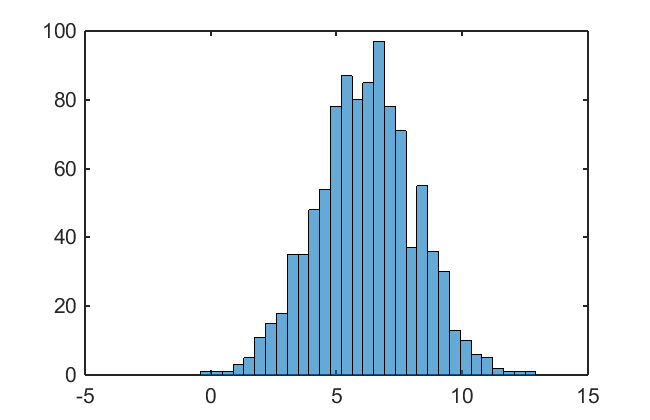

theta =

    6.1571

In [17]:
%plot -s 650,420
% theta
mu = 5;
theta = normrnd(mu,1)

sigma = 2;
m = 1000;

X = normrnd(theta,sigma,m,1);
histogram(X,31), xlim([-5 15])

In [31]:
n = 30;
XMAP = [];
for k = 1:n
    xbar = mean(X(1:k));
    xmap = k/(k + sigma^2)*xbar + sigma^2/(k + sigma^2)*mu;
    XMAP = [XMAP xmap];
end
%X(1:n)'
%XMAP

k = 0;
xmap = k/(k + sigma^2)*xbar + sigma^2/(k + sigma^2)*mu;
XMAP = [xmap XMAP];

In [34]:
n = 30;
XMLE = [];
for k = 1:n
    xmle = mean(X(1:k));    
    XMLE = [XMLE xmle];
end

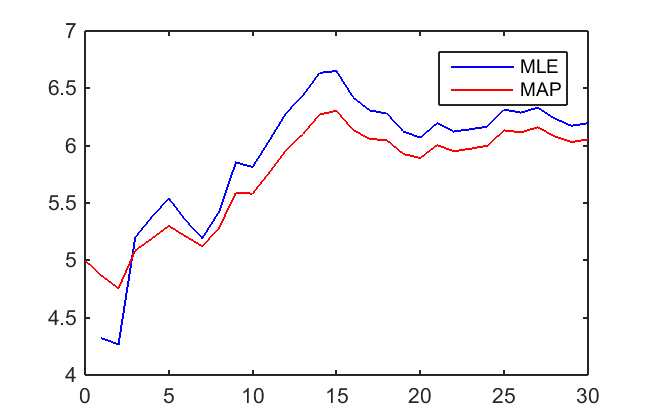

In [37]:
plot(1:n,XMLE,'b',0:n,XMAP,'r')
legend('MLE','MAP')

## 3.3. Object Tracking in Computer Vision 

- Optional
- Lecture: Introduction to Computer Vision by Prof. Aaron Bobick at Georgia Tech

In [15]:
%%html
<iframe width="560" height="315" 
src="https://www.youtube.com/embed/rf3DKqWajWY" frameborder="0" allowfullscreen>
</iframe>

In [16]:
%%html
<iframe width="560" height="315" 
src="https://www.youtube.com/embed/5yUjYCkm2jI" frameborder="0" allowfullscreen>
</iframe>

__iSystems tracking demo__

In [17]:
%%html
<iframe width="420" height="315" 
src="https://www.youtube.com/embed/_-niSgzEhSk" frameborder="0" allowfullscreen>
</iframe>

## 3.4. Robotics: Map-based Probabilistic Localization

- Optional
- Lecture: Autonomous Mobile Robots by Prof. Roland Siegwart at ETH Zurich

In [18]:
%%html
<iframe width="560" height="315" 
src="https://www.youtube.com/embed/y47jvldda-k" 
frameborder="0" allowfullscreen></iframe>

# 4. Kernel Density Estimation
- _non-parametric_ estimate of density
- Lecture: Learning Theory (Reza Shadmehr, Johns Hopkins University) 

In [19]:
%%html
<iframe width="560" height="315" 
src="https://www.youtube.com/embed/a357NoXy4Nk" frameborder="0" allowfullscreen>
</iframe>

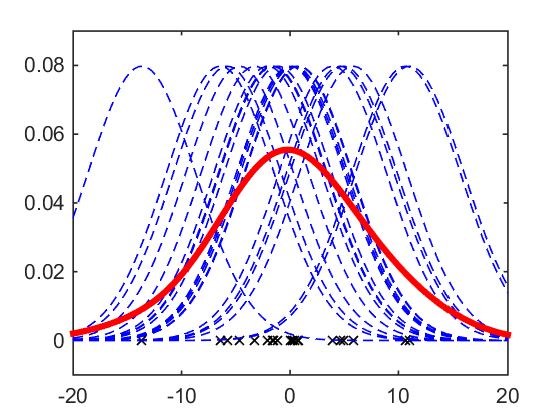

In [20]:
%plot -s 560,420
m = 20;
mu = 0;
sigma = 5;

x = normrnd(mu,sigma,1,m);
xp = linspace(-20,20,100);
y0 = zeros(1,m);

X = [];

for i = 1:m
    X(i,:) = normpdf(xp,x(i),sigma);
end

Xnorm = sum(X,1)/m;

plot(x,y0,'kx','markerfacecolor','k'), hold on
plot(xp,X,'b--')
plot(xp,Xnorm,'r','linewidth',3), hold off
ylim([-0.01 0.09])

In [1]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>